In [1]:
import os
import cv2
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from joblib import Parallel, delayed

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
def make_circle_img(image: np.array, area: int = 300) -> np.array:    
      """
      image defaulet image from data
      area size 
      """
      circ = cv2.circle(
          (np.ones(image.shape) * 255).astype(np.uint8),
          (image.shape[1]//2, image.shape[0]//2),
          area,
          (0,0,0),
          -1
          )

      mask = circ
      image = cv2.subtract(image, mask)

      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
      cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      cnts = cnts[0] if len(cnts) == 2 else cnts[1]
      cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
      for c in cnts:
          x,y,w,h = cv2.boundingRect(c)
          out = image[y:y+h, x:x+w]
          break
      return out

In [3]:
def resize_img(path_in: str, path_out: str, resize: tuple) -> None:
    """
    path_in :../input/siim-isic-melanoma-classification/jpeg/train/ISIC_0015719.jpg
    path_out: path to save resize image
    
    first resize to 1024 need to correct center position circle
    
    """
    name  = os.path.basename(path_in)
    path_save = os.path.join(path_out, name)
    img = Image.open(path_in)
    img = img.resize(
        (1024, 1024), resample = Image.BILINEAR)
    img_array = np.array(img)
    img = make_circle_img(img_array, 400)    
    img = Image.fromarray(img)
    img = img.resize(
        (resize[0], resize[1]), resample = Image.BILINEAR)
    
    img.save(path_save)  

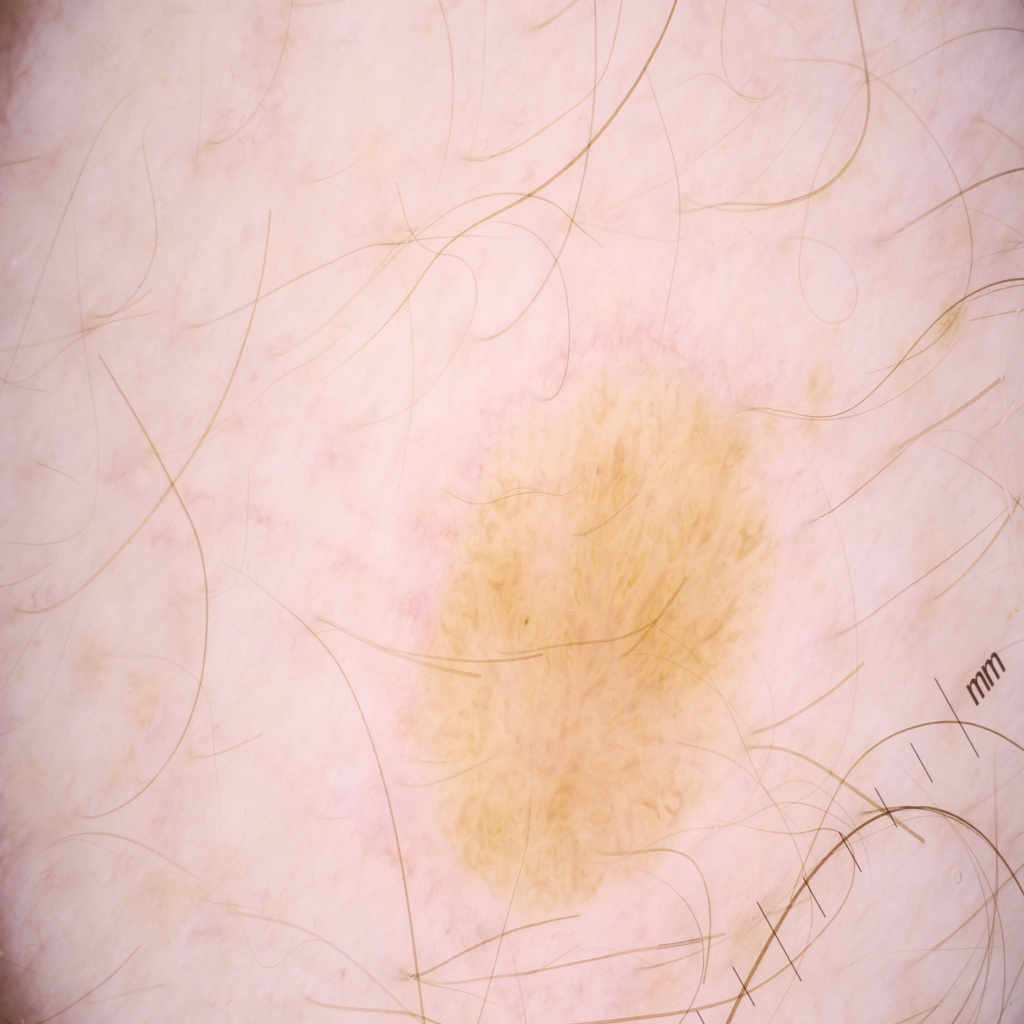

In [4]:
p = '../input/siim-isic-melanoma-classification/jpeg/train/ISIC_0080752.jpg'
img = Image.open(p)
img = img.resize((1024,1024),resample = Image.BILINEAR)
img

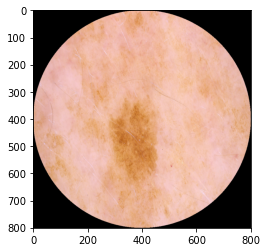

In [5]:
p = '../input/siim-isic-melanoma-classification/jpeg/train/ISIC_0074268.jpg'
img = Image.open(p)
img = img.resize((1024,1024),resample = Image.BILINEAR)
img_array = np.array(img)
img = make_circle_img(img_array, 400)
plt.imshow(img)

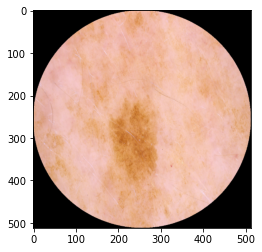

In [6]:
img = cv2.resize(img, (512,512))
plt.imshow(img)

In [7]:
#need path to save
! mkdir /kaggle/working/train512
! mkdir /kaggle/working/test512

In [8]:
path_in = '../input/siim-isic-melanoma-classification/jpeg/train'
path_out = '/kaggle/working/train512'

images = glob.glob(os.path.join(path_in, '*.jpg'))
Parallel(n_jobs = 12)(
                    delayed(resize_img)(
                        i,
                        path_out,
                        (512,512)
                    ) for i in tqdm(images)
)

  0%|          | 36/33126 [00:05<1:05:08,  8.47it/s]/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
100%|██████████| 33126/33126 [1:21:33<00:00,  6.77it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
def save_to_zip(out_path):
    # ZIP & rm -rf (remove) folder

    if 'train' in out_path:
        !zip -r train512.zip train512
        !rm -rf train512
        
    if 'test' in out_path:
        !zip -r test512.zip test512
        !rm -rf test512

In [10]:
save_to_zip("train")

  adding: train512/ (stored 0%)
  adding: train512/ISIC_9783959.jpg (deflated 3%)
  adding: train512/ISIC_7115605.jpg (deflated 4%)
  adding: train512/ISIC_8195332.jpg (deflated 3%)
  adding: train512/ISIC_4012291.jpg (deflated 2%)
  adding: train512/ISIC_6598889.jpg (deflated 5%)
  adding: train512/ISIC_8987085.jpg (deflated 5%)
  adding: train512/ISIC_5416567.jpg (deflated 4%)
  adding: train512/ISIC_7288186.jpg (deflated 5%)
  adding: train512/ISIC_7205378.jpg (deflated 5%)
  adding: train512/ISIC_9723532.jpg (deflated 4%)
  adding: train512/ISIC_7847294.jpg (deflated 4%)
  adding: train512/ISIC_2975553.jpg (deflated 5%)
  adding: train512/ISIC_3274253.jpg (deflated 4%)
  adding: train512/ISIC_9408967.jpg (deflated 4%)
  adding: train512/ISIC_1953808.jpg (deflated 5%)
  adding: train512/ISIC_2215389.jpg (deflated 5%)
  adding: train512/ISIC_6334958.jpg (deflated 3%)
  adding: train512/ISIC_3181358.jpg (deflated 3%)
  adding: train512/ISIC_0896313.jpg (deflated 3%)
  adding: train512

In [11]:
# path_in = '../input/siim-isic-melanoma-classification/jpeg/test'
# path_out = '/kaggle/working/test512'

# images = glob.glob(os.path.join(path_in, '*.jpg'))
# Parallel(n_jobs = 12)(
#                     delayed(resize_img)(i, path_out, (512,512))
#                     for i in tqdm(images)
#                     )

In [12]:
save_to_zip("test")

  adding: test512/ (stored 0%)
